# 주제분석
1. 당뇨병, 뇌졸중/심장질환, 심장질환 발생 시 나타나는 특징 및 이들 간의 연관성 분석

### 데이터 분석 순서
- 이진 분류 데이터 세트 찾기
- 탐색(시각화)
- 전처리(비중): 10% 가 넘으면 대체
- 데이터 세트 분리(stratify=True)
- GridSearchCV(DTC) : 교차검증
- fit: graphviz
- predict (정확도)
- 오차행렬
- proba
- 정밀도, 재현율 수립
- cuv -> thresholds
- 조정

### 🏣 당뇨(diabetes) 데이터 프레임 컬럼 설명 (diabetes_df)

| 컬럼명                 | 설명                                                                                      |
|---------------------|-----------------------------------------------------------------------------------------|
| `gender`            | 성별                                                                                      |
| `age`               | 나이                                                                                      |
| `hypertension`      | 고혈압 유/무                                                                               |
| `heart_disease`     | 심장질환 유/무                                                                             |
| `smoking_history`   | 흡연 유/무                                                                                 |
| `bmi`               | 체질량 지수 (BMI) <br> - 저체중: 18.5 미만 <br> - 정상: 18.5-24.9 <br> - 과체중: 25-29.9 <br> - 비만: 30 이상 |
| `HbA1c_level`       | 당화혈색소 (최근 2~3개월 평균 수치) <br> - 정상: 5.7% 미만 <br> - 당뇨병 전 단계: 5.7%-6.4% <br> - 🤢 당뇨병: **6.5%** 이상 |
| `blood_glucose_level` | 혈중 포도당 수치 <br> - 공복 혈당 수치: 정상 범위 대략 70-99 mg/dL <br> - 식후 혈당 수치: 정상 범위 대략 140 mg/dL 이하 |
| `diabetes`          | 당뇨 유/무                                                                                 |


In [1]:
# 당뇨, 심장/뇌졸증 질환 데이터프레임 파일 생성
import pandas as pd

path = './datasets/diabetes_disease.csv' 

di_df = pd.read_csv(path)
di_df

di_need_df = di_df.copy()
di_need_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [2]:
# 결측치
di_df.isna().sum()

# 결측치는 없음

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [3]:
# 중복값 (환자 번호에 대한 구분이 불가하여 다른 환자로 가정하여 중복값 별도 미제거)
di_df.duplicated().sum()

3854

In [4]:
# Smoking history, Male 범주형 데이터에 대해서 labelEncoding 사용 (수업 복습)
from sklearn.preprocessing import LabelEncoder

smoking_history_encoder = LabelEncoder()
smoking_category = smoking_history_encoder.fit_transform(di_need_df['smoking_history'].tolist())
di_need_df['smoking_history'] = smoking_category

gender_encoder = LabelEncoder()
genders = gender_encoder.fit_transform(di_need_df['gender'].tolist())
di_need_df['gender'] = genders

di_need_df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [5]:
# bmi, HbA1c_level, blood_glucose_level 의 비교를 편하게 하기 위해서 표준화 작업 진행
std_df = di_need_df.loc[:, ['bmi', 'HbA1c_level', 'blood_glucose_level']]
std_df

,bmi,HbA1c_level,blood_glucose_level
0,25.19,6.6,140
1,27.32,6.6,80
2,27.32,5.7,158
3,23.45,5.0,155
4,20.14,4.8,155
...,...,...,...
99995,27.32,6.2,90
99996,17.37,6.5,100
99997,27.83,5.7,155
99998,35.42,4.0,100


In [6]:
# 표준화 작업 완료
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_df[['bmi','HbA1c_level', 'blood_glucose_level']] = std.fit_transform(std_df[['bmi','HbA1c_level', 'blood_glucose_level']])
std_df


,bmi,HbA1c_level,blood_glucose_level
0,-0.321056,1.001706,0.047704
1,-0.000116,1.001706,-1.426210
2,-0.000116,0.161108,0.489878
3,-0.583232,-0.492690,0.416183
4,-1.081970,-0.679490,0.416183
...,...,...,...
99995,-0.000116,0.628107,-1.180558
99996,-1.499343,0.908306,-0.934905
99997,0.076729,0.161108,0.416183
99998,1.220361,-1.426688,-0.934905


In [7]:
di_need_df[['bmi','HbA1c_level', 'blood_glucose_level']]= std_df.iloc[std_df[['bmi','HbA1c_level', 'blood_glucose_level']].index].reset_index(drop=True)
di_need_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,-0.321056,1.001706,0.047704,0
1,0,54.0,0,0,0,-0.000116,1.001706,-1.426210,0
2,1,28.0,0,0,4,-0.000116,0.161108,0.489878,0
3,0,36.0,0,0,1,-0.583232,-0.492690,0.416183,0
4,1,76.0,1,1,1,-1.081970,-0.679490,0.416183,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,-0.000116,0.628107,-1.180558,0
99996,0,2.0,0,0,0,-1.499343,0.908306,-0.934905,0
99997,1,66.0,0,0,3,0.076729,0.161108,0.416183,0
99998,0,24.0,0,0,4,1.220361,-1.426688,-0.934905,0


<Figure size 1200x1000 with 0 Axes>

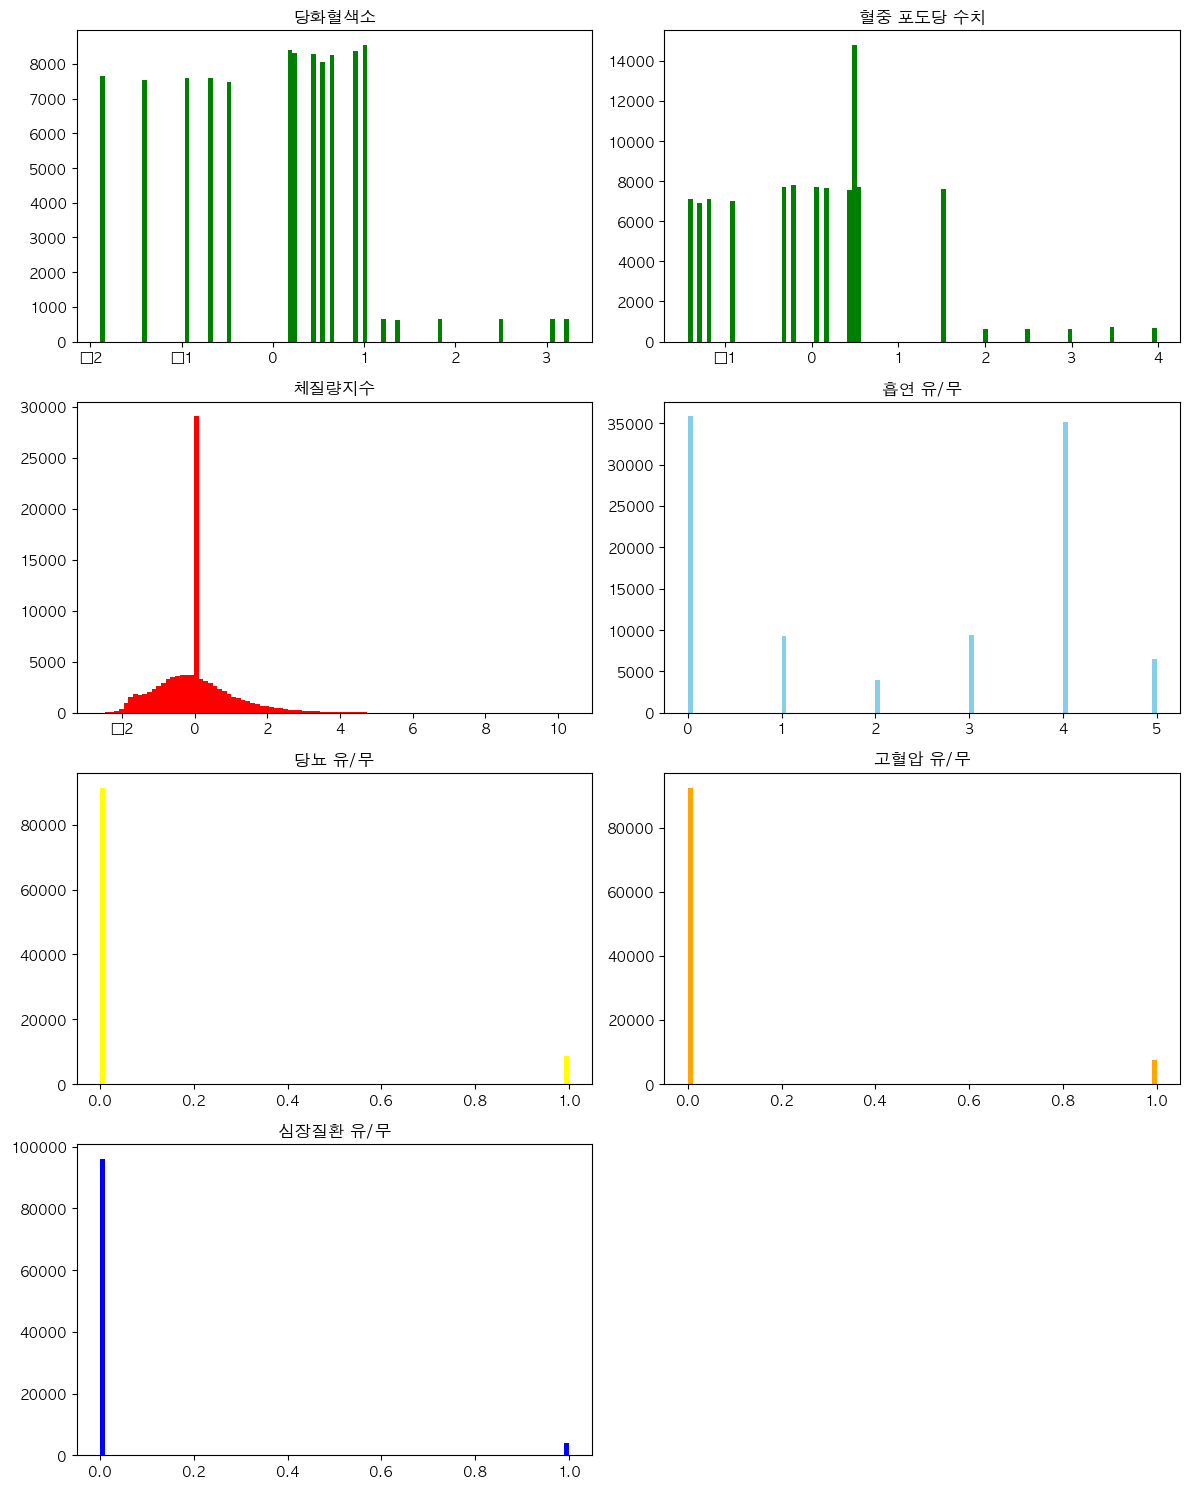

In [8]:
# 시각화를 통한 데이터 탐색
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

axes[0,0].hist(di_need_df['HbA1c_level'], bins=100, color="green")
axes[0,0].set_title('당화혈색소')

axes[0,1].hist(di_need_df['blood_glucose_level'], bins=100, color="green")
axes[0,1].set_title('혈중 포도당 수치')

axes[1,0].hist(di_need_df['bmi'], bins=100, color="red")
axes[1,0].set_title('체질량지수')

axes[1,1].hist(di_need_df['smoking_history'], bins=100, color="skyblue")
axes[1,1].set_title('흡연 유/무')

axes[2,0].hist(di_need_df['diabetes'], bins=100, color="yellow")
axes[2,0].set_title('당뇨 유/무')

axes[2,1].hist(di_need_df['hypertension'], bins=100, color="orange" )
axes[2,1].set_title('고혈압 유/무')

axes[3,0].hist(di_need_df['heart_disease'], bins=100, color="blue")
axes[3,0].set_title('심장질환 유/무')

axes[3,1].set_visible(False)

plt.tight_layout()
plt.show()




,count,mean,std,min,25%,50%,75%,max
HbA1c_level,100000.0,-3.410605e-18,1.000005,-1.893686,-0.67949,0.254508,0.628107,3.2433


,count,mean,std,min,25%,50%,75%,max
blood_glucose_level,100000.0,-2.786749e-16,1.000005,-1.42621,-0.934905,0.047704,0.514444,3.978142


<Axes: xlabel='diabetes', ylabel='bmi'>

<Figure size 1200x1000 with 0 Axes>

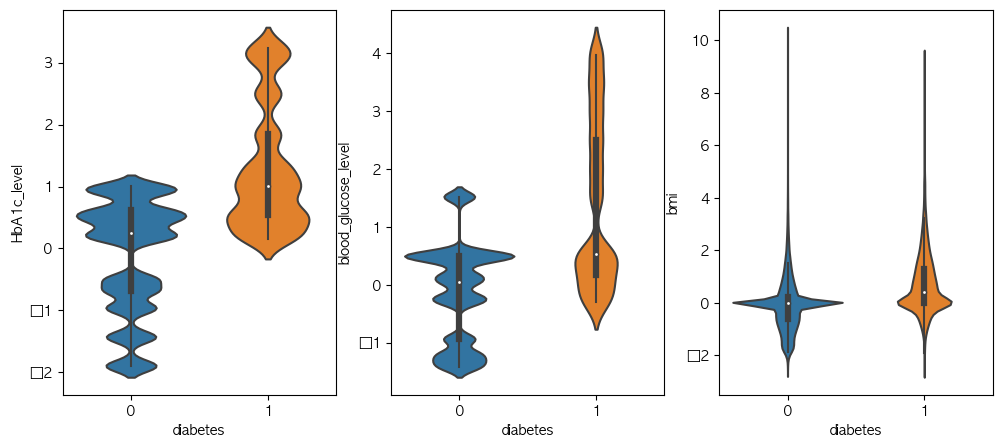

In [9]:
# 위의 데이터를 확인했을 때 당화혈색소 수치, 혈중 포도당 수치, 체질량 지수에서
# 특정 범위에 몰려있는 count 그래프를 확인했으며,해당 feature에 대해서 사분위수 확인 후 분포 그래프 확인
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
display(di_need_df[['HbA1c_level']].describe().T)
display(di_need_df[['blood_glucose_level']].describe().T)

plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(1,3, figsize=(12, 5))
sns.violinplot(x='diabetes', y='HbA1c_level', data= di_need_df, ax=axes[0])
sns.violinplot(x='diabetes', y='blood_glucose_level', data= di_need_df, ax=axes[1])
sns.violinplot(x='diabetes', y='bmi', data= di_need_df, ax=axes[2])

# 분포를 확인 했을 때 특정 위치에 분포가 몰려있긴 하지만 특이점이 그래프 상으로 보이지 않아 넘어감


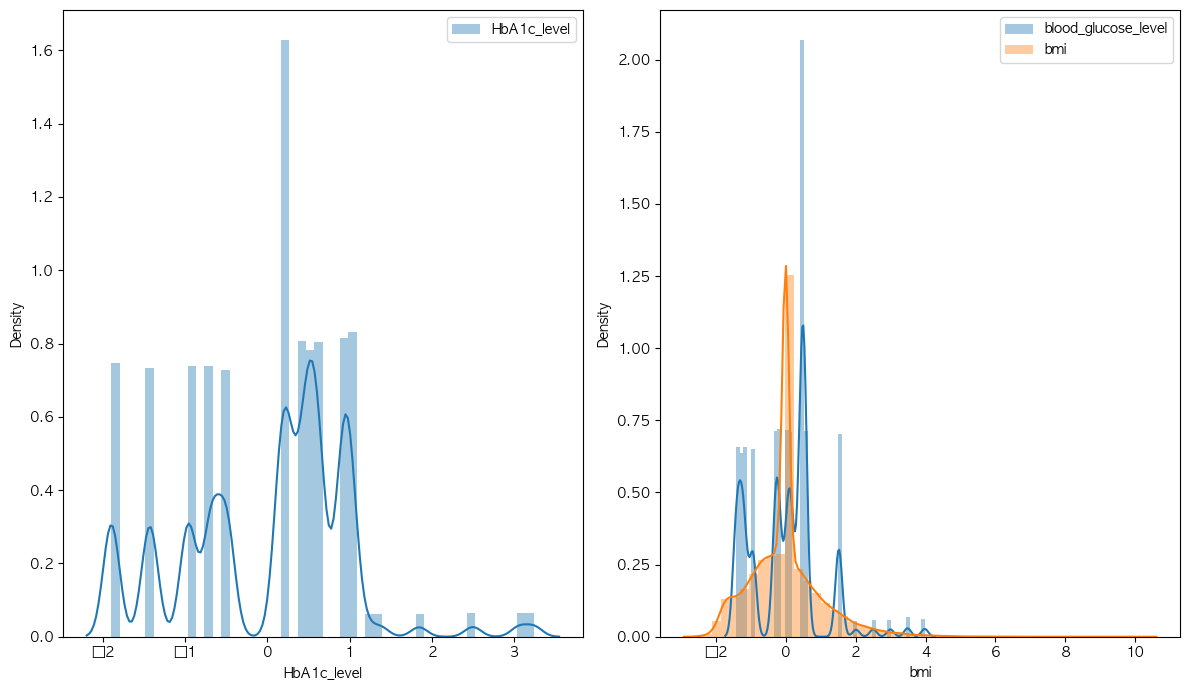

In [10]:
# 해당 bar 그래프에서 확인한 수치형 데이터에 대하여 kde (커널 밀도 추정)을 사용하여 연속적으로 
# 데이터의 확률 분포를 활용
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 7))
                         
sns.distplot(di_need_df['HbA1c_level'], kde=True, label= 'HbA1c_level',ax=axes[0])
axes[0].legend()

sns.distplot(di_need_df['blood_glucose_level'], kde=True, label='blood_glucose_level', ax=axes[1])
sns.distplot(di_need_df['bmi'], kde=True, label='bmi')
axes[1].legend()

plt.tight_layout()
plt.show()


In [11]:
# 비중 확인을 위한 사분위수 확인
# 0에 대한 결과는 있을 수 있기 때문에 별도의 비중을 구분할 필요는 없음
# 단, 수업 과정에 대한 이해 및 모집단에 대하여 해당 질병이 어느정도 있는지 확인하기 위해서 사용
import numpy as np
di_df.describe().T

zero_features = ['hypertension', 'heart_disease', 'diabetes']

total_count = di_df.shape[0]

for feature in zero_features:
    zero_count = di_df[di_df[feature] == 1][feature].count()
    print(f'{feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%')

# hypertension(고혈압): 92515건, 7.485%
# heart_disease(심장질환): 96058건, 3.942%
# diabetes(당뇨): 91500건, 8.5%

hypertension: 7485건, 7.485%
heart_disease: 3942건, 3.942%
diabetes: 8500건, 8.5%


In [12]:
# 데이터 세트 분리
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

features = di_need_df.iloc[:, :-1] # 데이터 프레임
display(type(features))
targets = di_need_df.iloc[:, -1] # 시리즈
display(type(targets))

# stratify 훈련데이터와 검증데이터 서로 비중 맞추기
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=321)

dtc = DecisionTreeClassifier()
dtc.fit(X_train.values, y_train.values)

di_need_feature_names = di_need_df.columns[:-1]
di_need_feature_names

# 교차검증을 하지 않고 지니계수 그래프 확인
export_graphviz(dtc,
               out_file='./images/diabetes_normal_dtc01.dot',
               class_names = ['0','1'],
               feature_names= di_need_feature_names ,
               impurity = True,
               filled=True)

print(dtc.max_depth)  # max_depth 확인 (과적합)
print(dtc.min_samples_split)  # min_samples_split 확인

pandas.core.frame.DataFrame

pandas.core.series.Series

None
2


In [13]:
# 정확도 확인
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))

print(f'정확도: {accuracy_score(y_test, dtc.predict(X_test.values)) * 100}%')
dtc.feature_importances_

정확도: 95.155%


array([0.0120628 , 0.07271477, 0.00412209, 0.00418445, 0.02671626,
       0.11385578, 0.49746154, 0.26888231])

In [14]:
import graphviz

with open('./images/diabetes_normal_dtc01.dot') as f:
    diabetes_normal_dtc01 = f.read()


diabetes_normal_dtc01_graph = graphviz.Source(diabetes_normal_dtc01)

In [15]:
diabetes_normal_dtc01_graph.format = 'png'
diabetes_normal_dtc01_graph.render(filename='diabetes_normal_dtc01', directory ='./images', format='png', cleanup=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.1891 to fit


'images/diabetes_normal_dtc01.png'

<img src='./images/diabetes_normal_dtc01.png'>

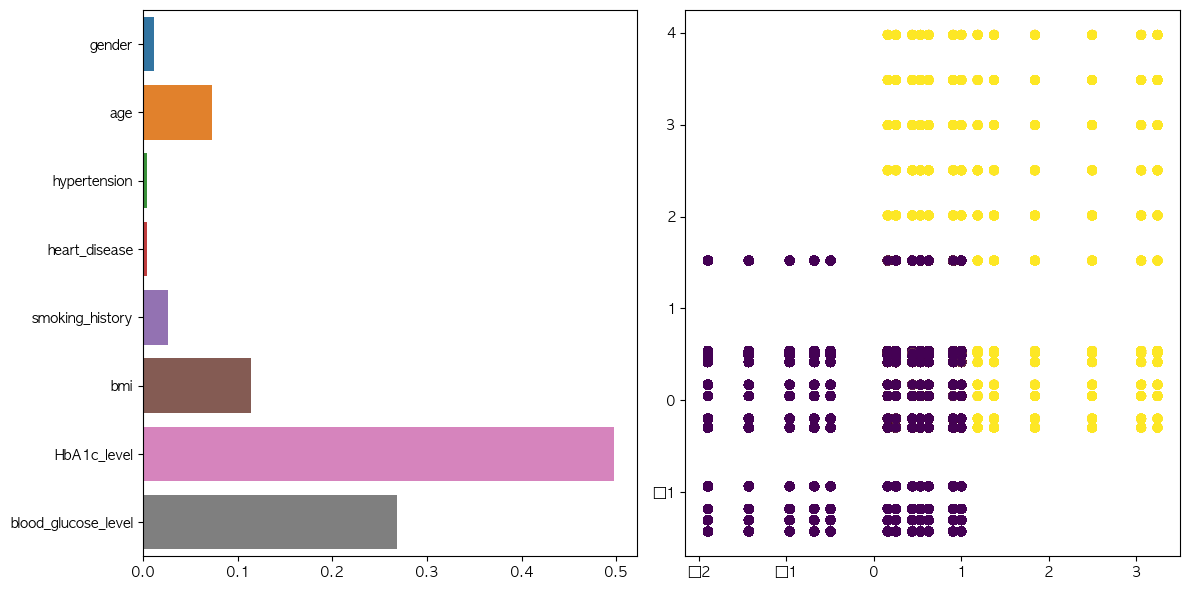

In [16]:
# 해당 그래프로는 확인 불가 다른 검증 방법 필요
# 우선 어떤 부분에서 비중이 있는지 bar 그래프 및 scatter 그래프 확인 후 accuracy 점수 확인 후 
# 교차 검증검증 부분으로 진행 예정
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=dtc.feature_importances_, y=features.columns, ax=axes[0])
axes[1].scatter(features.iloc[:, 6], features.iloc[:, 7], c=targets)
axes[1].xaxis.set_major_locator(ticker.AutoLocator())

plt.tight_layout()
plt.show()


In [17]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

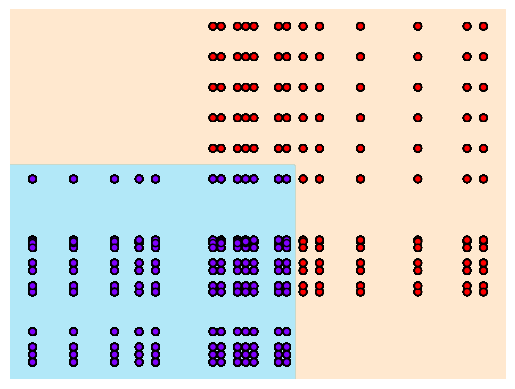

In [18]:
features_6_7 = features.iloc[:, [6, 7]]
visualize_boundary(dtc, features_6_7, targets)

# 그래프 확인결과 당화혈색소와 혈당에 대해서틑 별도의 과적치 없이 뚜렷하게 구분이 가능

In [19]:
# 그래프 비즈를 통해서 리프나 지니개수의 수치를 알 수 없기 때문에 하이퍼 파라미터 조정 불가
# 기존 dtc 의 max 값을 통해 min_samples_split 확인
# 교차 검증 진행
# GridSearchCV 사용

params = {'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [3, 4, 5, 6, 7, 8]}

dtc = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtc, param_grid = params, cv=3, refit=True, n_jobs= -1)
grid_tree


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]})

In [20]:
# 데이터 훈련 
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]})

In [21]:
# 데이터 결과 확인
grid_tree.cv_results_
result = pd.DataFrame(grid_tree.cv_results_)
result[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 3, 'min_samples_split': 3}",0.972150,1,0.973150,0.972025,0.971274
1,"{'max_depth': 3, 'min_samples_split': 4}",0.972150,1,0.973150,0.972025,0.971274
2,"{'max_depth': 3, 'min_samples_split': 5}",0.972150,1,0.973150,0.972025,0.971274
3,"{'max_depth': 3, 'min_samples_split': 6}",0.972150,1,0.973150,0.972025,0.971274
4,"{'max_depth': 3, 'min_samples_split': 7}",0.972150,1,0.973150,0.972025,0.971274
5,"{'max_depth': 3, 'min_samples_split': 8}",0.972150,1,0.973150,0.972025,0.971274
6,"{'max_depth': 4, 'min_samples_split': 3}",0.972150,1,0.973150,0.972025,0.971274
7,"{'max_depth': 4, 'min_samples_split': 4}",0.972150,1,0.973150,0.972025,0.971274
8,"{'max_depth': 4, 'min_samples_split': 5}",0.972150,1,0.973150,0.972025,0.971274
9,"{'max_depth': 4, 'min_samples_split': 6}",0.972150,1,0.973150,0.972025,0.971274


In [22]:
# 정확도 확인 
print(grid_tree.best_params_, grid_tree.best_score_, sep='\n')
dtc = grid_tree.best_estimator_
prediction = dtc.predict(X_test)

grid_tree.best_estimator_

{'max_depth': 3, 'min_samples_split': 3}
0.9721499890536601


DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [23]:
# 교차 검증 이후 정확도 확인
from sklearn.metrics import accuracy_score

accuracy_score(y_test, grid_tree.predict(X_test.values))

print(f'정확도: {accuracy_score(y_test, grid_tree.predict(X_test.values)) * 100}%')
dtc.feature_importances_

정확도: 97.075%


array([0.        , 0.01240244, 0.        , 0.        , 0.        ,
       0.        , 0.66563423, 0.32196333])

In [24]:
# 그래프 비즈를 사용한 시각화 
# 교차검증을 해서 최고 best_estimator 를 dtc 에 대입

export_graphviz(dtc,
               out_file='./images/diabetes_gridsearch_dtc01.dot',
               class_names = ['0','1'],
               feature_names= di_need_feature_names ,
               impurity = True,
               filled=True)


In [25]:
# dot 파일 생성
with open('./images/diabetes_gridsearch_dtc01.dot') as f:
    diabetes_gridsearch_dtc01 = f.read()


diabetes_gridsearch_dtc01_graph = graphviz.Source(diabetes_gridsearch_dtc01)

In [26]:
diabetes_gridsearch_dtc01_graph.format = 'png'
diabetes_gridsearch_dtc01_graph.render(filename='diabetes_gridsearch_dtc01', directory ='./images', format='png', cleanup=False)

'images/diabetes_gridsearch_dtc01.png'

<img src='./images/diabetes_gridsearch_dtc01.png'>

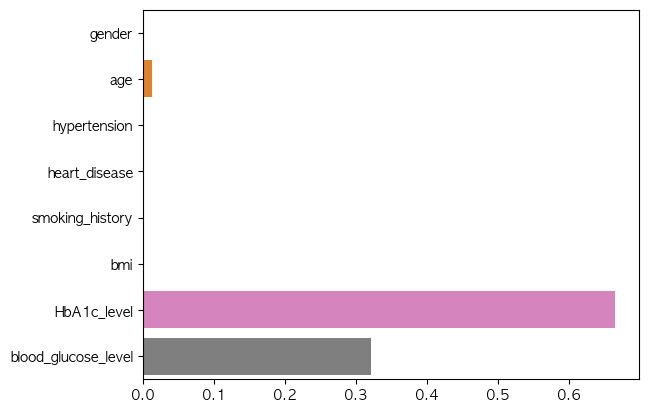

In [27]:
# 데이터 시각화 
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

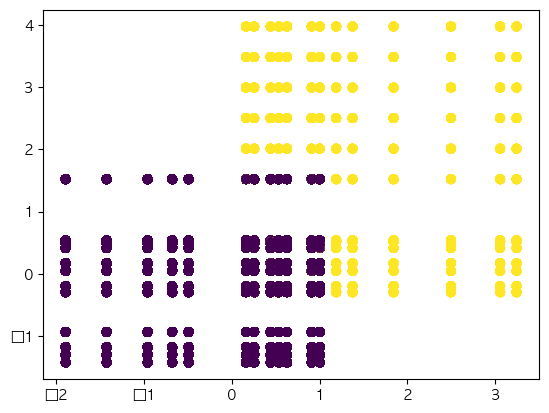

In [28]:
plt.scatter(features.iloc[:, 6], features.iloc[:, 7], c=targets)

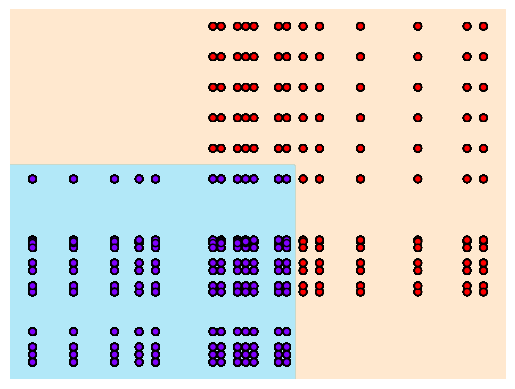

In [29]:
visualize_boundary(dtc, features_6_7, targets)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    # if classifier is not None and  X_test is not None:
    #     fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
    #     titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

    #     for (title, normalize), ax in zip(titles_options, axes.flatten()):
    #         disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
    #         disp.ax_.set_title(title)
    #     plt.show()

In [31]:
get_evaluation(y_test, prediction, dtc, X_test)

오차 행렬
[[18300     0]
 [  585  1115]]
정확도: 0.9708, 정밀도: 1.0000, 재현율: 0.6559, F1: 0.7922, ROC-AUC: 0.8279
################################################################################


In [32]:
# 정밀도가 1로 나온 데이터에 대하여 현재 해당 데이터 셋이 1로 구분되어있다는 것을 인지하고 오차가 없다는 내용으로 확인
# GridSearchCV 를 사용했을 때 feature를 연관있는 2개만 제외하고 다 값을 측정안하는 부분이 있어 확인 불가
# 재현율을 높여 정밀도를 낮춰서 정확도를 조금 더 높일 수 있는 방법이 있는지 확인이 필요
# >> 1. 표준화를 시킨 데이터에 대해서 이상치가 있는경우 제거
# >> 2. 교차검증을 통한 정확도 확인
# >> 임계치를 낮춰 재현율을 높여서 f1 score를 높일 수 있는 방법이 있는지 필요
# 2개의 feature 에 대해서만 importance를 가지고 있기 때문에 훈련 데이터에 대해서 재정의 하고 proba 작업 진행

In [33]:
# 이상치 제거
di_need_df = di_need_df[di_need_df['bmi'].between(-1.96, 1.96)].reset_index(drop=True)
di_need_df = di_need_df[di_need_df['HbA1c_level'].between(-1.96, 1.96)].reset_index(drop=True)
di_need_df = di_need_df[di_need_df['blood_glucose_level'].between(-1.96, 1.96)].reset_index(drop=True)
di_need_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,-0.321056,1.001706,0.047704,0
1,0,54.0,0,0,0,-0.000116,1.001706,-1.426210,0
2,1,28.0,0,0,4,-0.000116,0.161108,0.489878,0
3,0,36.0,0,0,1,-0.583232,-0.492690,0.416183,0
4,1,76.0,1,1,1,-1.081970,-0.679490,0.416183,0
...,...,...,...,...,...,...,...,...,...
90952,0,80.0,0,0,0,-0.000116,0.628107,-1.180558,0
90953,0,2.0,0,0,0,-1.499343,0.908306,-0.934905,0
90954,1,66.0,0,0,3,0.076729,0.161108,0.416183,0
90955,0,24.0,0,0,4,1.220361,-1.426688,-0.934905,0


In [34]:
dtc.feature_importances_

array([0.67573828, 0.32426172])

In [35]:
# 이상치 제거 후 데이터 분리, 교차검증 (GridSearchCV) 
features = di_need_df.iloc[:, -3:-1].values
targets = di_need_df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(features, targets,stratify=targets, test_size=0.2, random_state=321)

params = {'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [3, 4, 5, 6, 7, 8]}

dtc = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtc, param_grid = params, cv=3, refit=True, return_train_score= True, n_jobs= -1)
grid_tree

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]},
             return_train_score=True)

In [36]:
# 훈련 진행
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]},
             return_train_score=True)

In [37]:
grid_tree.cv_results_

{'mean_fit_time': array([0.00918587, 0.00948373, 0.00850995, 0.00862185, 0.01135198,
        0.01199325, 0.01360973, 0.01108607, 0.00943542, 0.01458645,
        0.011705  , 0.0089337 , 0.01124628, 0.01587661, 0.01481469,
        0.01266615, 0.01174092, 0.01103067, 0.01389392, 0.01123238,
        0.01135961, 0.01479864, 0.01336161, 0.00990295, 0.01316222,
        0.01267107, 0.012724  , 0.01722725, 0.0140806 , 0.01658368,
        0.01097115, 0.01346739, 0.01430003, 0.01244624, 0.01244243,
        0.01096177]),
 'std_fit_time': array([0.00019225, 0.00144924, 0.00057486, 0.00118762, 0.00068946,
        0.00151514, 0.00196275, 0.00262009, 0.00075003, 0.00220113,
        0.00171129, 0.00015328, 0.00250679, 0.00199288, 0.0024432 ,
        0.00264633, 0.00160046, 0.00127801, 0.00489958, 0.00193046,
        0.00278225, 0.00304475, 0.00244998, 0.00056239, 0.00412662,
        0.00404935, 0.00234827, 0.00297841, 0.00419701, 0.0017577 ,
        0.00074449, 0.00247133, 0.00255921, 0.00267556, 0.001

In [38]:
from sklearn.metrics import accuracy_score

dtc = grid_tree.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 97.2021%


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[17506     0]
 [  509   177]]
정확도: 0.9720, 정밀도: 1.0000, 재현율: 0.2580, F1: 0.4102, ROC-AUC: 0.6290
################################################################################


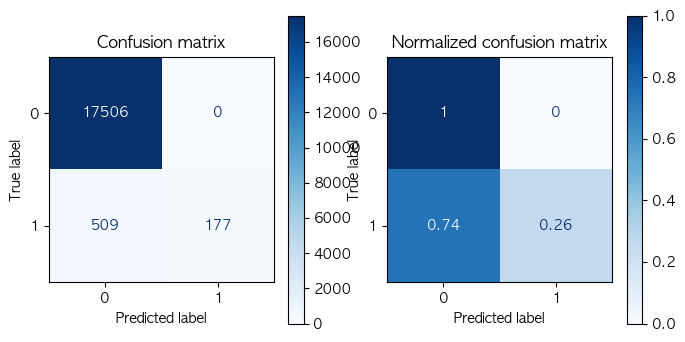

In [40]:
get_evaluation(y_test, prediction, dtc, X_test)

In [41]:
# 교차훈련까지 한 데이터에 대하여 predict_proba 에 대하여 검증 데이터 범주 반환
# predict() 메소드는 범주를 예측하여 반환하고,
# predict_praba() 메소드는 확률(probability)을 반환합니다.

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.0, 1.0] 1
[1.0, 0.0] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[0.0, 1.0] 1
[0.9367522494314624, 0.06324775056853763] 0
[1.0, 0.0] 0
[0.9367522494314624, 0.06324775056853763] 0
[0.9367522494314624, 0.06324775056853763] 0
[0.9367522494314624, 0.06324775056853763] 0
[0.9367522494314624, 0.06324775056853763] 0
[0.9367522494314624, 0.06324775056853763] 0
[0.9367522494314624, 0.06324775056853763] 0
[1.0, 0.0] 0
[0.9367522494314624, 0.06324775056853763] 0
[1.0, 0.0] 0
[0.9367522494314624, 0.06324775056853763] 0
[1.0, 0.0] 0
[0.9367522494314624, 0.06324775056853763] 0
[0.9367522494314624, 0.06324775056853763] 0
[0.9367522494314624, 0.06324775056853763] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[0.9367522494314624, 0.06324775056853763] 0
[1.0, 0.0] 0
[0.9367522494314624, 0.06324775056853763] 0
[0.9367522494314624, 0.06324775056853763] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[0.9367522494314624, 0.06324775056853763] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[0.9367522

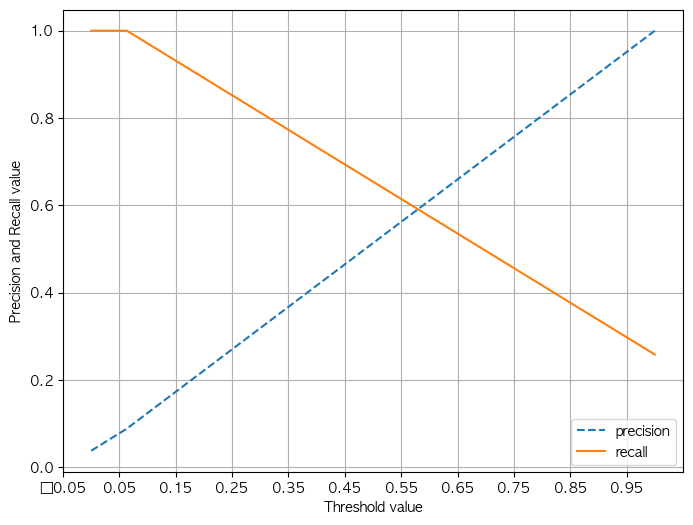

In [42]:
# thresholds 를 판단하기 위해 precision_recall_curve 을 사용
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [44]:
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.06324775, 1.        ])

In [48]:
proba_class1

array([[1.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.06324775],
       [0.        ]])

In [50]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)


In [49]:
from sklearn.preprocessing import Binarizer
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)
# get_evaluation_by_thresholds(y_test, proba_class1,\
#                              [0.06324775056853763, 0.06324775056853762, 0.063247750568537618])


# get_evaluation_by_thresholds(y_test, proba_class1,\
#                              [0.0632477505685376181765455783079232787713408470153808593749])


# 임계치를 낮춰서 정밀도를 낮추는 작업

0.0
오차 행렬
[[10428  7078]
 [    0   686]]
정확도: 0.6109, 정밀도: 0.0884, 재현율: 1.0000, F1: 0.1624, ROC-AUC: 0.7978
################################################################################
0.06324775056853763
오차 행렬
[[17506     0]
 [  509   177]]
정확도: 0.9720, 정밀도: 1.0000, 재현율: 0.2580, F1: 0.4102, ROC-AUC: 0.6290
################################################################################
1.0
오차 행렬
[[17506     0]
 [  686     0]]
정확도: 0.9623, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################


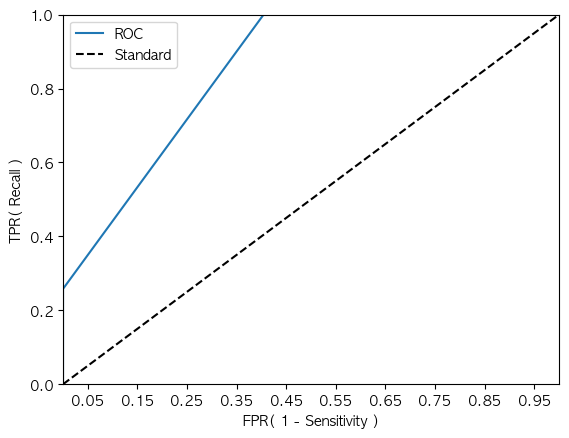

In [47]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [ ]:
# 임계점을 조절하기 위해 threshold 값을 확인해야한다.
# 정밀도를 떨어뜨려서 임계점을 낮춰야 함